In [40]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import os.path

In [5]:
train_labels = []
train_samples = []

In [6]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    train_older = randint(65,100)
    train_samples.append(train_older)
    train_labels.append(0)
    
for i in range(1000):
    train_younger = randint(13,64)
    train_samples.append(train_younger)
    train_labels.append(0)
    train_older = randint(65, 100)
    train_samples.append(train_older)
    train_labels.append(1)

In [8]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [9]:
train_labels

array([0, 1, 0, ..., 0, 1, 0])

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_trained_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [11]:
scaled_trained_samples

array([[0.03448276],
       [0.68965517],
       [0.51724138],
       ...,
       [0.51724138],
       [0.96551724],
       [0.48275862]])

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy

In [14]:
model = Sequential([
                    Dense(units =16, input_shape = (1,), activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    Dense(units = 2, activation = 'softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit(x = scaled_trained_samples, y = train_labels, validation_split=0.2, shuffle=True, verbose=2, epochs = 30, batch_size = 10)

Epoch 1/30
168/168 - 1s - loss: 0.4797 - accuracy: 0.8357 - val_loss: 0.3749 - val_accuracy: 0.8762
Epoch 2/30
168/168 - 0s - loss: 0.3108 - accuracy: 0.9202 - val_loss: 0.2921 - val_accuracy: 0.9357
Epoch 3/30
168/168 - 0s - loss: 0.2658 - accuracy: 0.9298 - val_loss: 0.2822 - val_accuracy: 0.9143
Epoch 4/30
168/168 - 0s - loss: 0.2576 - accuracy: 0.9351 - val_loss: 0.2657 - val_accuracy: 0.9357
Epoch 5/30
168/168 - 0s - loss: 0.2492 - accuracy: 0.9411 - val_loss: 0.2592 - val_accuracy: 0.9429
Epoch 6/30
168/168 - 0s - loss: 0.2446 - accuracy: 0.9357 - val_loss: 0.2557 - val_accuracy: 0.9548
Epoch 7/30
168/168 - 0s - loss: 0.2416 - accuracy: 0.9411 - val_loss: 0.2541 - val_accuracy: 0.9429
Epoch 8/30
168/168 - 0s - loss: 0.2380 - accuracy: 0.9381 - val_loss: 0.2541 - val_accuracy: 0.9429
Epoch 9/30
168/168 - 0s - loss: 0.2365 - accuracy: 0.9393 - val_loss: 0.2549 - val_accuracy: 0.9429
Epoch 10/30
168/168 - 0s - loss: 0.2350 - accuracy: 0.9435 - val_loss: 0.2575 - val_accuracy: 0.9357

In [21]:
test_samples = []
test_labels = []

for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [22]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [23]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=1)

42/42 [==============================] - 0s 1ms/step


In [24]:
predictions

array([[0.94016886, 0.05983117],
       [0.05684791, 0.9431521 ],
       [0.0176899 , 0.9823101 ],
       [0.9503675 , 0.04963248],
       [0.07731672, 0.92268324],
       [0.02193988, 0.97806007],
       [0.15331514, 0.8466849 ],
       [0.89989716, 0.10010292],
       [0.4196052 , 0.58039486],
       [0.94767505, 0.05232498],
       [0.05684791, 0.9431521 ],
       [0.32704493, 0.6729551 ],
       [0.9432853 , 0.05671474],
       [0.95288837, 0.04711164],
       [0.00665752, 0.99334246],
       [0.6153792 , 0.38462073],
       [0.1393821 , 0.86061794],
       [0.08552419, 0.9144758 ],
       [0.94252074, 0.05747924],
       [0.94252074, 0.05747924],
       [0.02718266, 0.97281736],
       [0.9447857 , 0.05521431],
       [0.9331962 , 0.06680381],
       [0.18794127, 0.81205875],
       [0.9481055 , 0.05189448],
       [0.4196052 , 0.5803948 ],
       [0.01970291, 0.9802971 ],
       [0.10434017, 0.8956598 ],
       [0.94924843, 0.05075157],
       [0.9518233 , 0.04817675],
       [0.

In [27]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [28]:
rounded_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(test_labels, rounded_predictions)
cm

array([[193,  17],
       [ 10, 200]], dtype=int64)

In [56]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.0f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

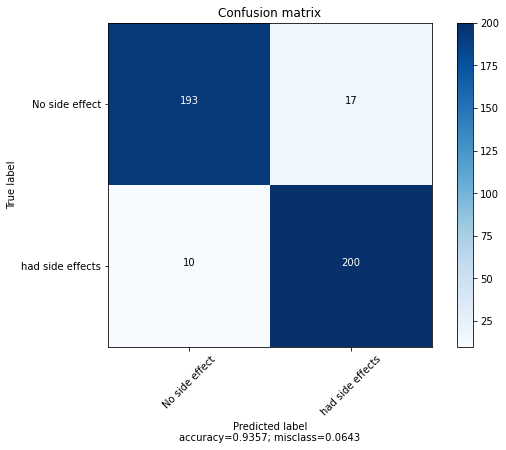

In [57]:
cm_plot_labels = ["No side effect", "had side effects"]
plot_confusion_matrix(cm, cm_plot_labels)

In [41]:
if os.path.isfile('model.h5') is False:
    model.save('model.h5')

In [61]:
if os.path.isfile('model_weights.h5') is False:
    model.save_weights('model_weights.h5')

In [58]:
from tensorflow.keras.models import load_model

new_model = load_model('model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [59]:
new_model.get_weights()

[array([[-0.3295995 ,  0.6624579 , -0.10062611,  0.5520315 , -0.06590492,
         -0.09598339, -0.4803862 , -0.03526697, -0.10939608,  0.24731019,
          0.5425101 ,  0.4950059 ,  0.33686134, -0.31012094,  0.5120092 ,
         -0.42841685]], dtype=float32),
 array([ 0.        , -0.29835537,  0.        , -0.05422708,  0.        ,
         0.        ,  0.        ,  0.192144  ,  0.14598121, -0.01440583,
        -0.27867335, -0.25852132, -0.09625814,  0.        , -0.2634805 ,
         0.        ], dtype=float32),
 array([[-2.15840042e-02, -2.04948664e-01,  1.76336855e-01,
         -3.21277916e-01,  2.58324713e-01,  2.42808670e-01,
         -2.07580730e-01,  2.91102737e-01,  5.85346520e-02,
          3.04759532e-01, -2.13807523e-02,  2.27200836e-01,
          2.25267738e-01,  2.78574735e-01, -1.83005244e-01,
          2.31940001e-01, -2.66943395e-01, -4.70991135e-02,
          1.88198060e-01, -3.46438587e-01, -2.97989517e-01,
          4.83664572e-02, -1.69288203e-01,  2.49542803e-01,
 

In [60]:
new_model.optimizer

In [62]:
model_2 = Sequential([
                    Dense(units =16, input_shape = (1,), activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    Dense(units = 2, activation = 'softmax')
])

In [64]:
model_2.load_weights("model_weights.h5")

In [65]:
model_2.get_weights()

[array([[-0.3295995 ,  0.6624579 , -0.10062611,  0.5520315 , -0.06590492,
         -0.09598339, -0.4803862 , -0.03526697, -0.10939608,  0.24731019,
          0.5425101 ,  0.4950059 ,  0.33686134, -0.31012094,  0.5120092 ,
         -0.42841685]], dtype=float32),
 array([ 0.        , -0.29835537,  0.        , -0.05422708,  0.        ,
         0.        ,  0.        ,  0.192144  ,  0.14598121, -0.01440583,
        -0.27867335, -0.25852132, -0.09625814,  0.        , -0.2634805 ,
         0.        ], dtype=float32),
 array([[-2.15840042e-02, -2.04948664e-01,  1.76336855e-01,
         -3.21277916e-01,  2.58324713e-01,  2.42808670e-01,
         -2.07580730e-01,  2.91102737e-01,  5.85346520e-02,
          3.04759532e-01, -2.13807523e-02,  2.27200836e-01,
          2.25267738e-01,  2.78574735e-01, -1.83005244e-01,
          2.31940001e-01, -2.66943395e-01, -4.70991135e-02,
          1.88198060e-01, -3.46438587e-01, -2.97989517e-01,
          4.83664572e-02, -1.69288203e-01,  2.49542803e-01,
 